### Import Libraries

In [666]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

In [667]:
df=pd.read_csv('/Users/macbookair/Desktop/project/kaggle/playground-series-s4e12/train.csv')

In [668]:
df.head(4)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0


In [669]:
df.drop('id', axis=1, inplace=True)

In [670]:
df.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [671]:
df.shape

(1200000, 20)

In [672]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1181295.0,41.145563,13.539950,18.000000,30.000000,41.000000,53.000000,64.000000
Annual Income,1155051.0,32745.217777,32179.506124,1.000000,8001.000000,23911.000000,44634.000000,149997.000000
Number of Dependents,1090328.0,2.009934,1.417338,0.000000,1.000000,2.000000,3.000000,4.000000
Health Score,1125924.0,25.613908,12.203462,2.012237,15.918959,24.578648,34.527209,58.975914
Previous Claims,835971.0,1.002689,0.982840,0.000000,0.000000,1.000000,2.000000,9.000000
Vehicle Age,1199994.0,9.569889,5.776189,0.000000,5.000000,10.000000,15.000000,19.000000
Credit Score,1062118.0,592.924350,149.981945,300.000000,468.000000,595.000000,721.000000,849.000000
Insurance Duration,1199999.0,5.018219,2.594331,1.000000,3.000000,5.000000,7.000000,9.000000
Premium Amount,1200000.0,1102.544822,864.998859,20.000000,514.000000,872.000000,1509.000000,4999.000000


In [673]:
df_info={
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
}

df_summary = pd.DataFrame(df_info)
df_summary 

,Data Type,Missing Values,Unique Values
Age,float64,18705,47
Gender,object,0,2
Annual Income,float64,44949,88593
Marital Status,object,18529,3
Number of Dependents,float64,109672,5
Education Level,object,0,4
Occupation,object,358075,3
Health Score,float64,74076,532655
Location,object,0,3
Policy Type,object,0,3


In [674]:
missing_percentage = df.isnull().mean() * 100

print('The percentage of the Missing Values:\n')
print(missing_percentage[missing_percentage > 0])

The percentage of the Missing Values:

Age                      1.558750
Annual Income            3.745750
Marital Status           1.544083
Number of Dependents     9.139333
Occupation              29.839583
Health Score             6.173000
Previous Claims         30.335750
Vehicle Age              0.000500
Credit Score            11.490167
Insurance Duration       0.000083
Customer Feedback        6.485333
dtype: float64


In [675]:
missing_rows = df[df.isnull().any(axis=1)]
missing_rows.head(5)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,Basic,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0


In [676]:
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')
print(df['Policy Start Date'].dtypes)

datetime64[ns]


In [677]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
num_cols

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,2869.0
1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,1483.0
2,23.0,25602.0,3.0,47.177549,1.0,14.0,NaN,3.0,567.0
3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0,765.0
4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,2022.0
...,...,...,...,...,...,...,...,...,...
1199995,36.0,27316.0,0.0,13.772907,NaN,5.0,372.0,3.0,1303.0
1199996,54.0,35786.0,NaN,11.483482,NaN,10.0,597.0,4.0,821.0
1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,NaN,6.0,371.0
1199998,55.0,NaN,1.0,18.547381,1.0,7.0,407.0,4.0,596.0


In [678]:
cat_cols = df.select_dtypes(include=['object'])
cat_cols

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,Female,Married,Bachelor's,Self-Employed,Urban,Premium,Poor,No,Weekly,House
1,Female,Divorced,Master's,NaN,Rural,Comprehensive,Average,Yes,Monthly,House
2,Male,Divorced,High School,Self-Employed,Suburban,Premium,Good,Yes,Weekly,House
3,Male,Married,Bachelor's,NaN,Rural,Basic,Poor,Yes,Daily,Apartment
4,Male,Single,Bachelor's,Self-Employed,Rural,Premium,Poor,Yes,Weekly,House
...,...,...,...,...,...,...,...,...,...,...
1199995,Female,Married,Master's,Unemployed,Urban,Premium,Poor,No,Daily,Apartment
1199996,Male,Divorced,Master's,Self-Employed,Rural,Comprehensive,Poor,No,Weekly,Apartment
1199997,Male,Divorced,Master's,NaN,Suburban,Basic,Good,No,Monthly,Condo
1199998,Male,Single,PhD,NaN,Suburban,Premium,Poor,No,Daily,Apartment


In [679]:
date_cols = df.select_dtypes(include=['datetime64'])
date_cols

,Policy Start Date
0,2023-12-23 15:21:39.134960
1,2023-06-12 15:21:39.111551
2,2023-09-30 15:21:39.221386
3,2024-06-12 15:21:39.226954
4,2021-12-01 15:21:39.252145
...,...
1199995,2023-05-03 15:21:39.257696
1199996,2022-09-10 15:21:39.134960
1199997,2021-05-25 15:21:39.106582
1199998,2021-09-19 15:21:39.190215


In [680]:
target_col = df['Premium Amount']
target_col

0          2869.0
1          1483.0
2           567.0
3           765.0
4          2022.0
            ...  
1199995    1303.0
1199996     821.0
1199997     371.0
1199998     596.0
1199999    2480.0
Name: Premium Amount, Length: 1200000, dtype: float64

### Univariate analysis

Skewness of Age: -0.01
Skewness of Annual Income: 1.47
Skewness of Number of Dependents: -0.01
Skewness of Health Score: 0.28
Skewness of Previous Claims: 0.91
Skewness of Vehicle Age: -0.02
Skewness of Credit Score: -0.11
Skewness of Insurance Duration: -0.01
Skewness of Premium Amount: 1.24


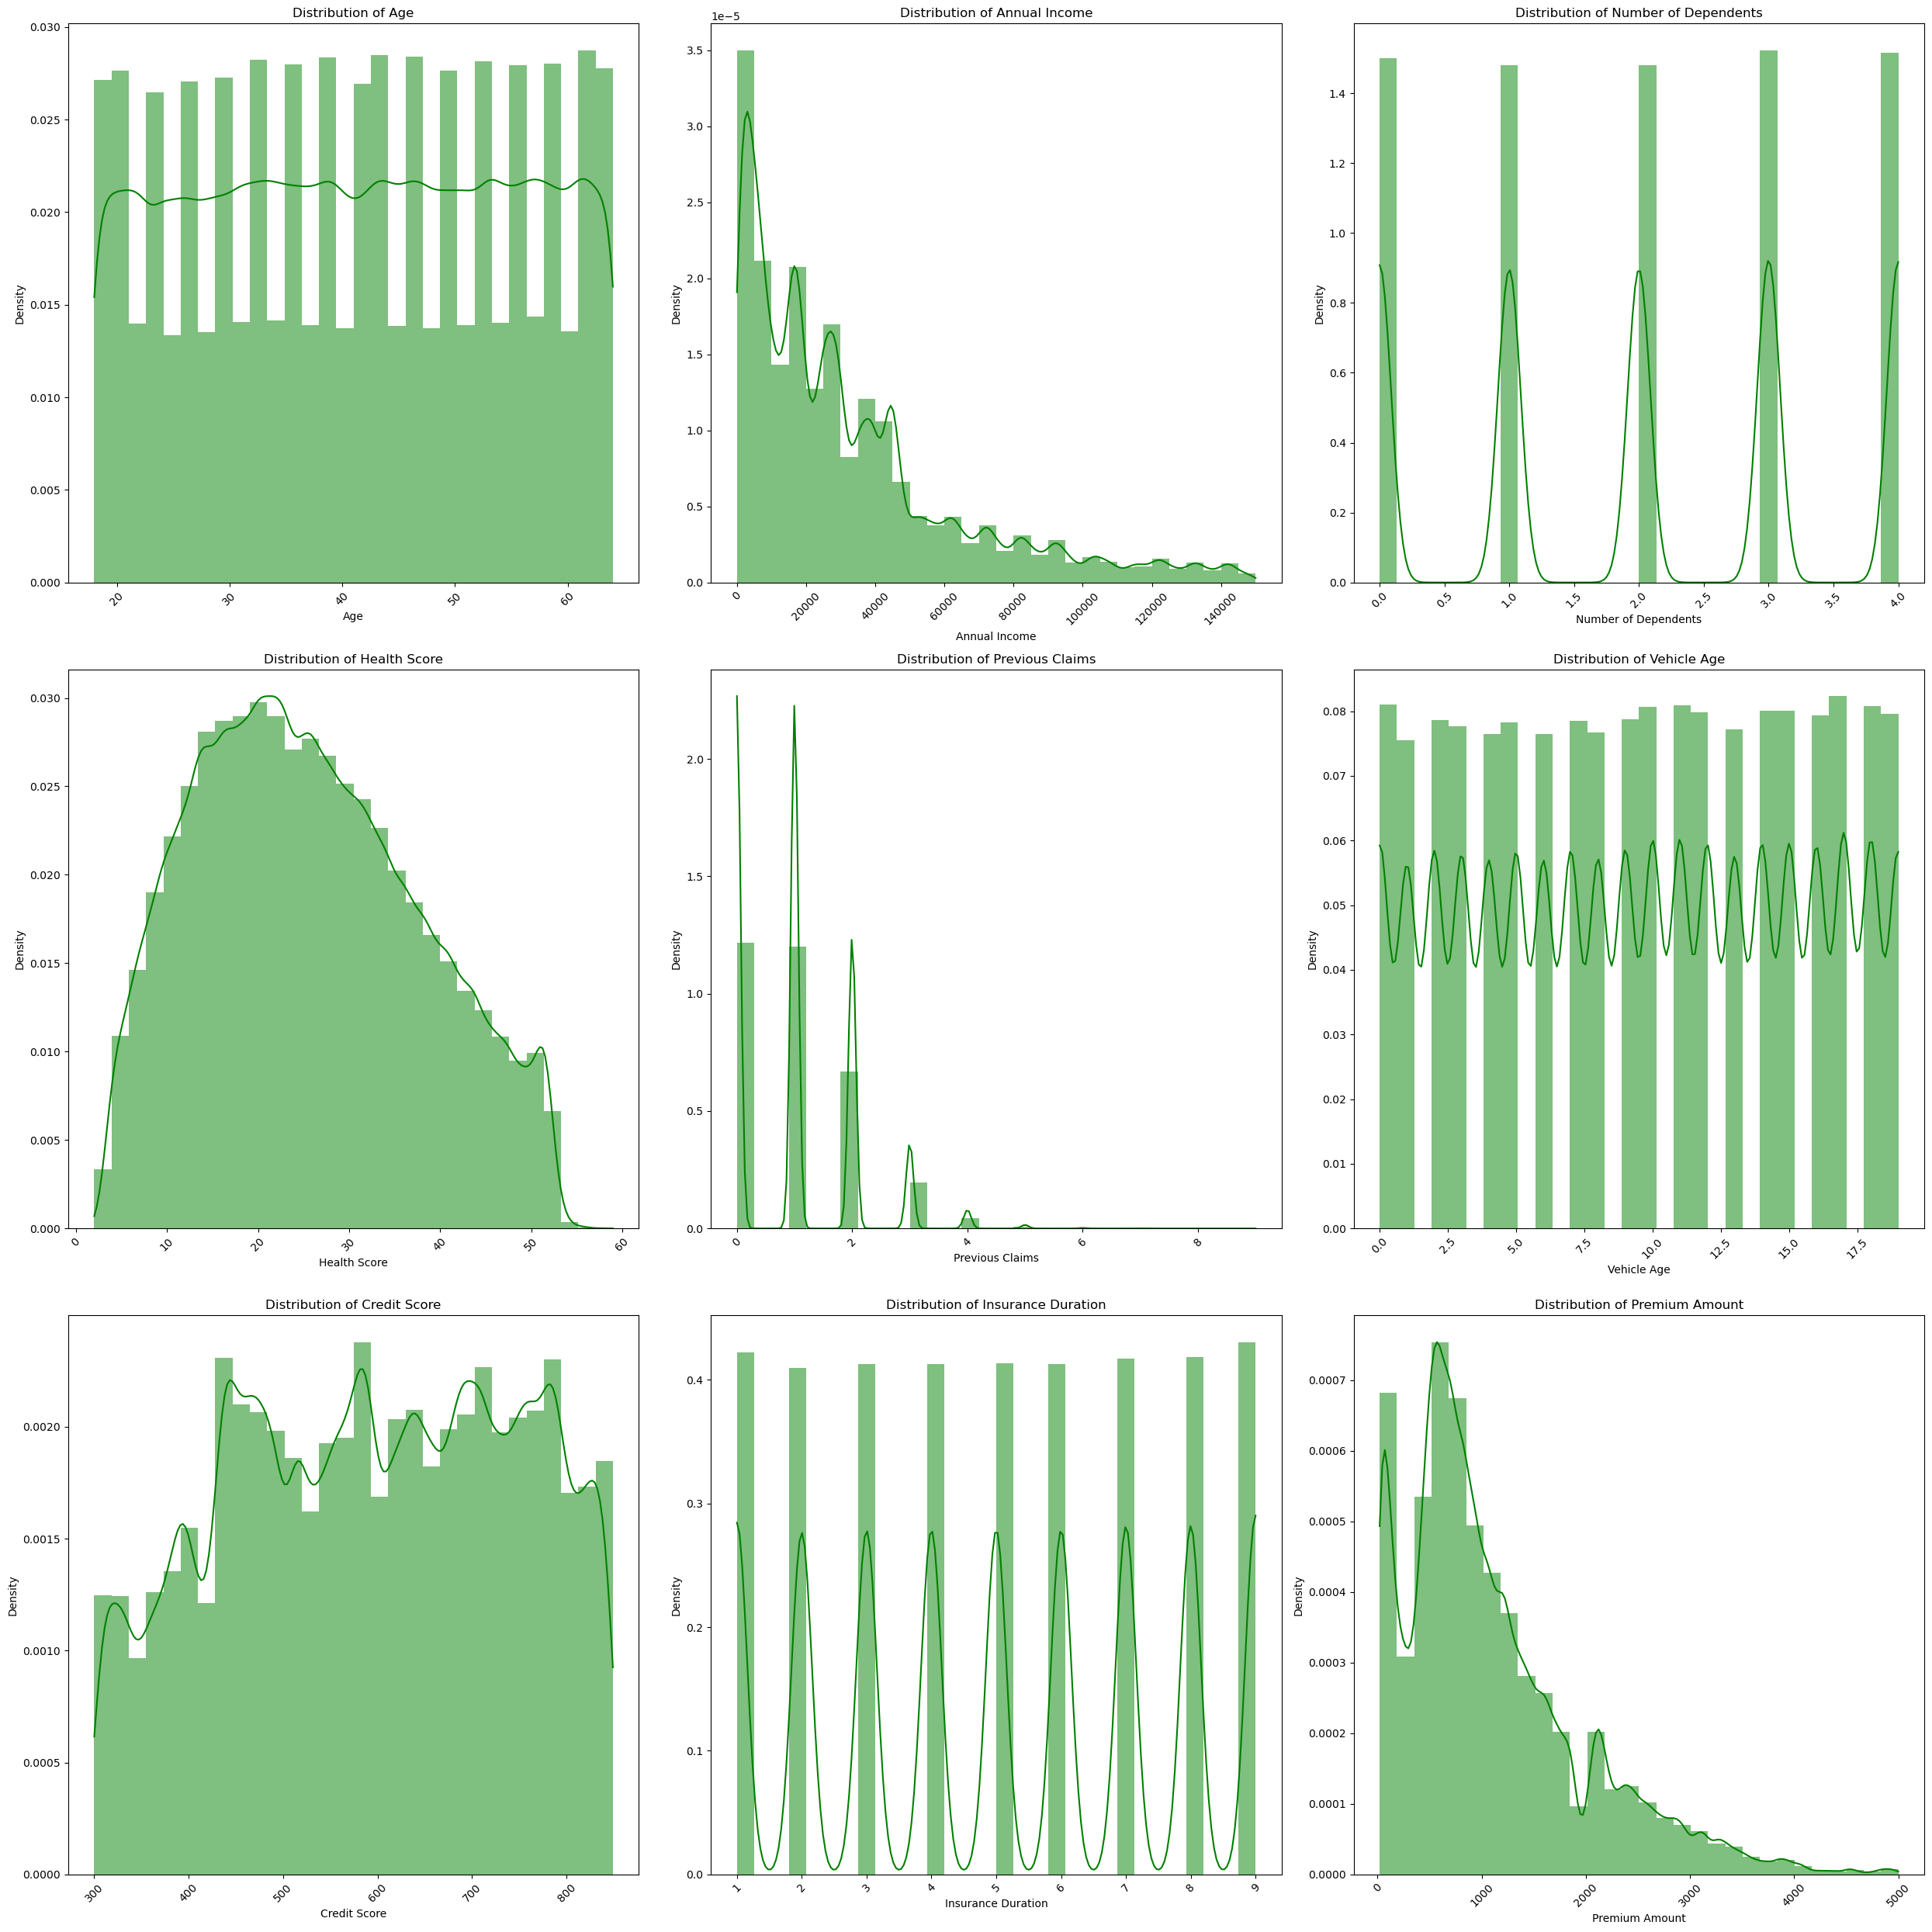

In [681]:
plt.figure(figsize=(25, 25))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    
    sns.histplot(df[col], kde=True, bins=30, color='green', stat='density', linewidth=0)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.xticks(rotation=45)

    feature_skewness = skew(df[col].dropna())
    print(f"Skewness of {col}: {feature_skewness:.2f}")

plt.tight_layout()
plt.show()

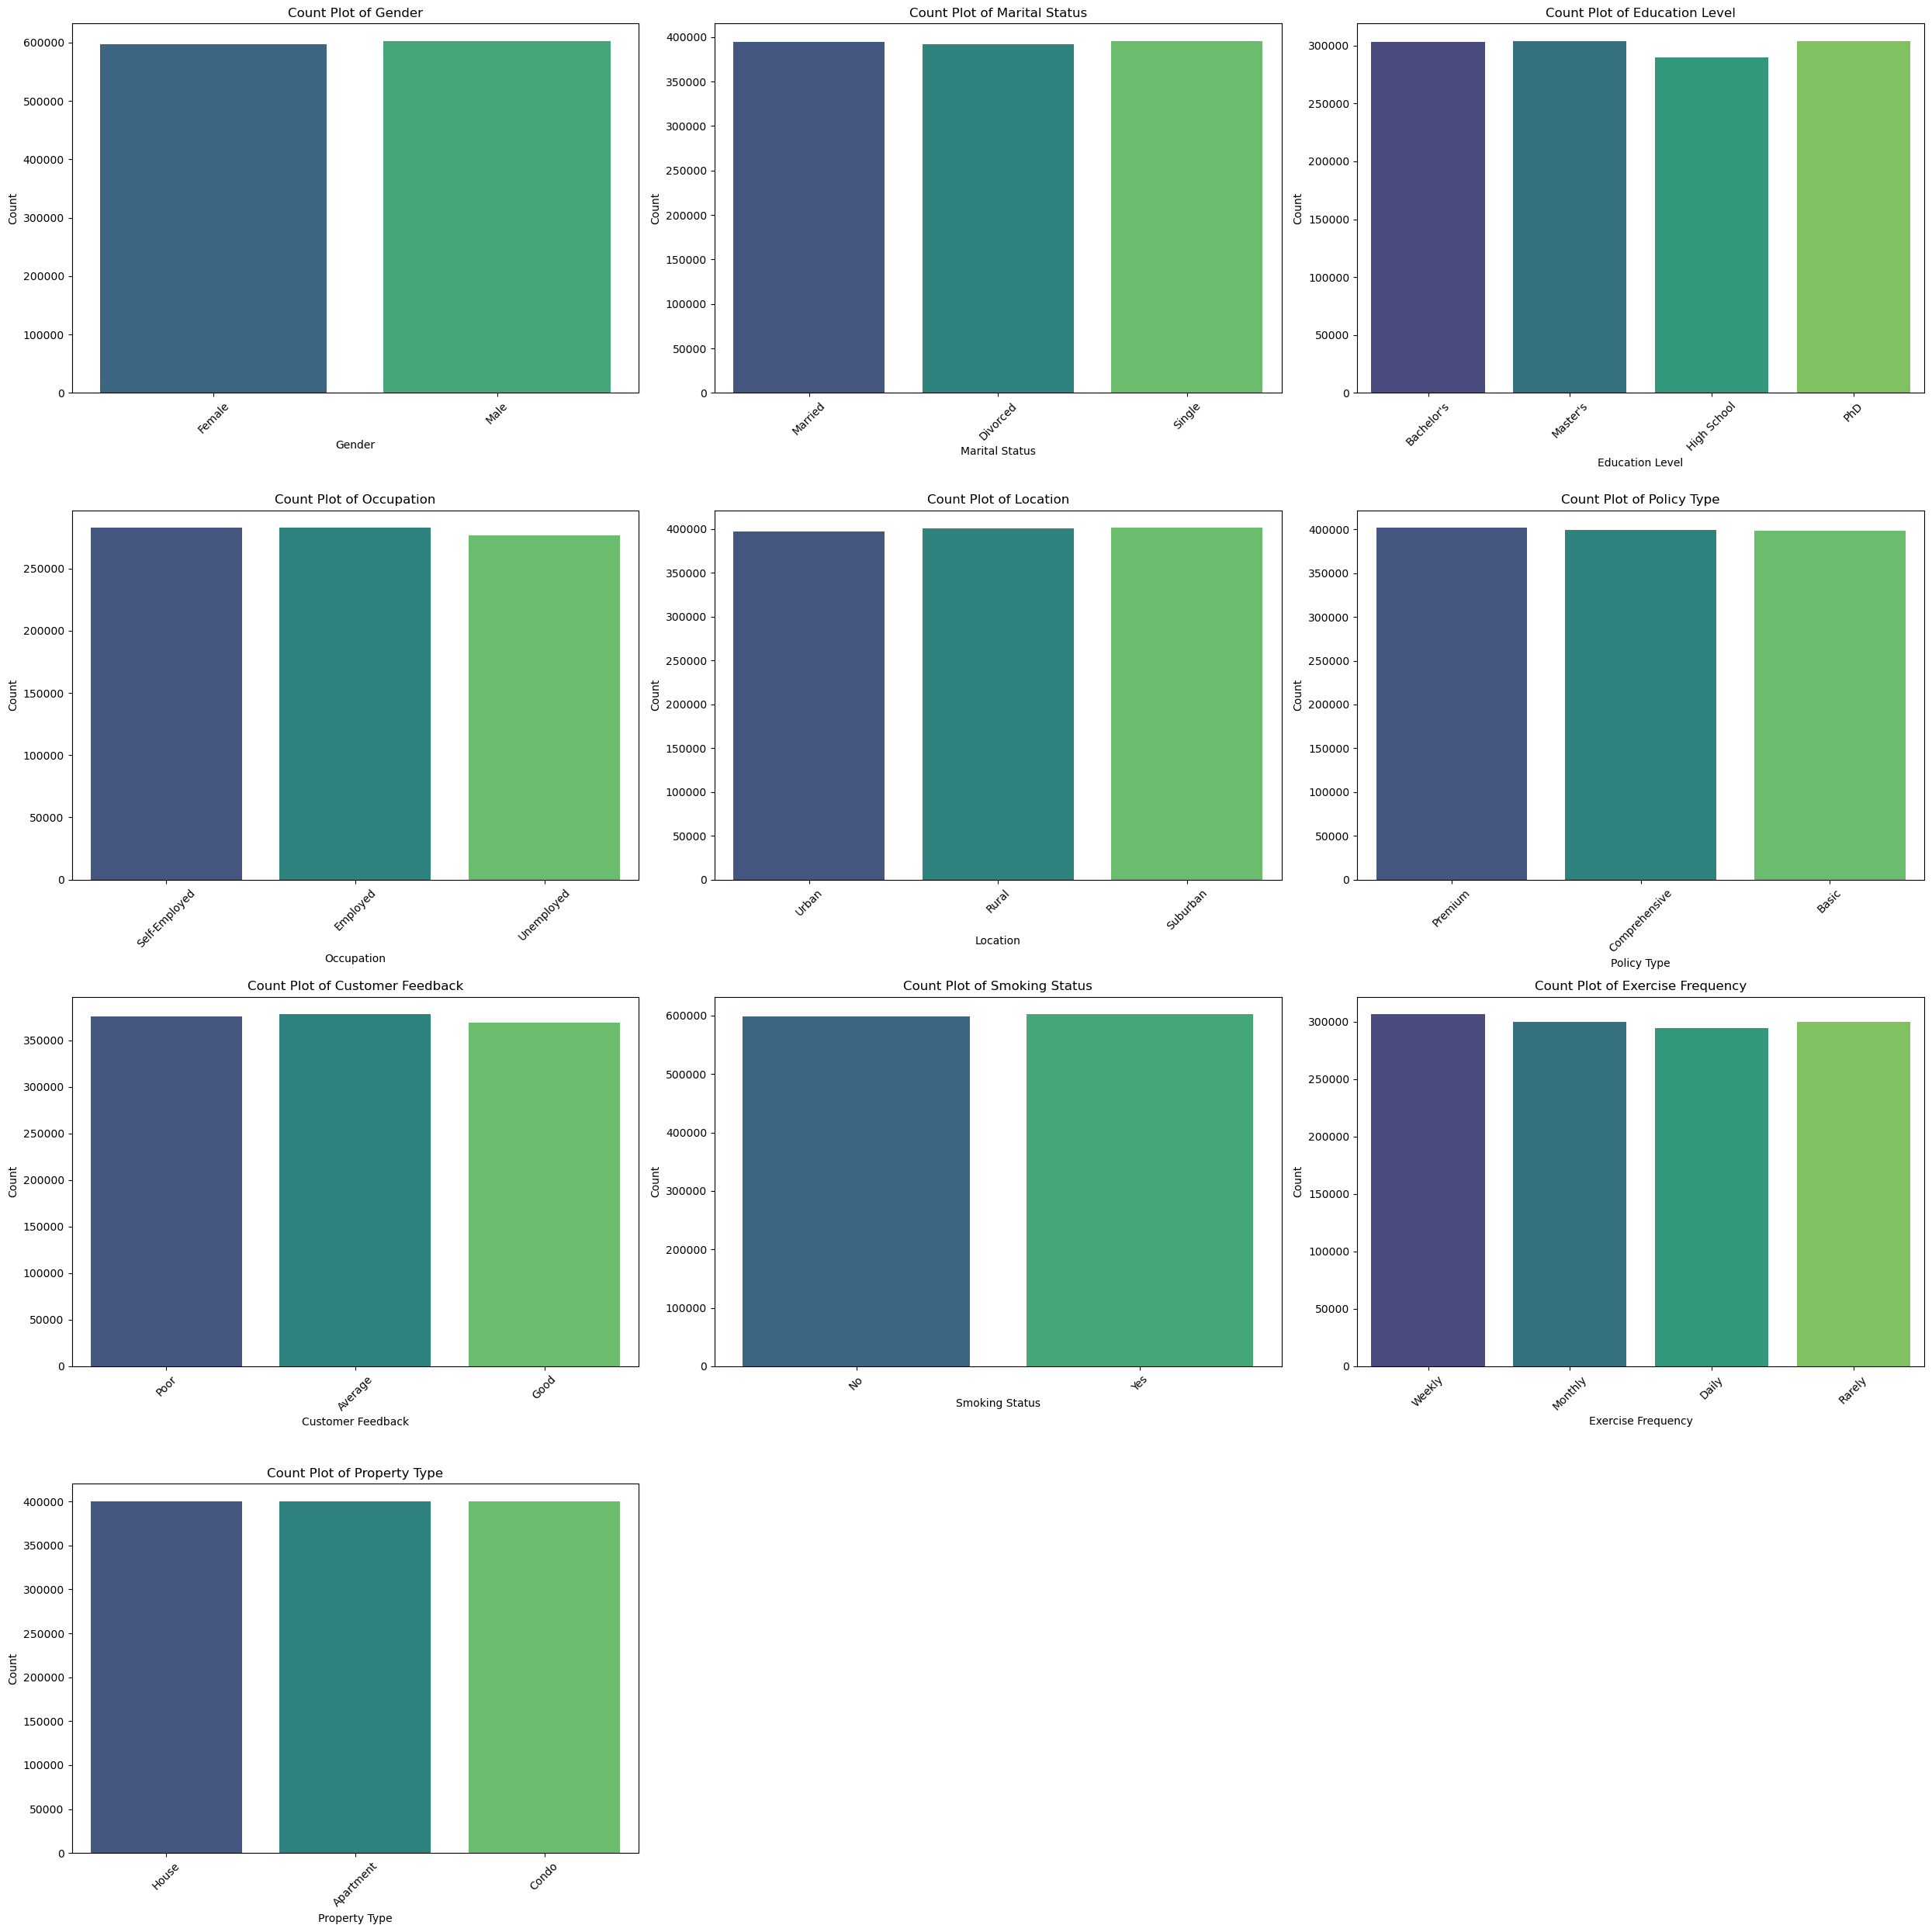

In [682]:
plt.figure(figsize=(25, 25))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 3, i)
    
    sns.countplot(data=df, x=col, palette='viridis')
    
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Bivariate Analysis

In the bivariate analysis, we’ll focus on understanding the relationship between the individual features and the target variable, Premium Amount.

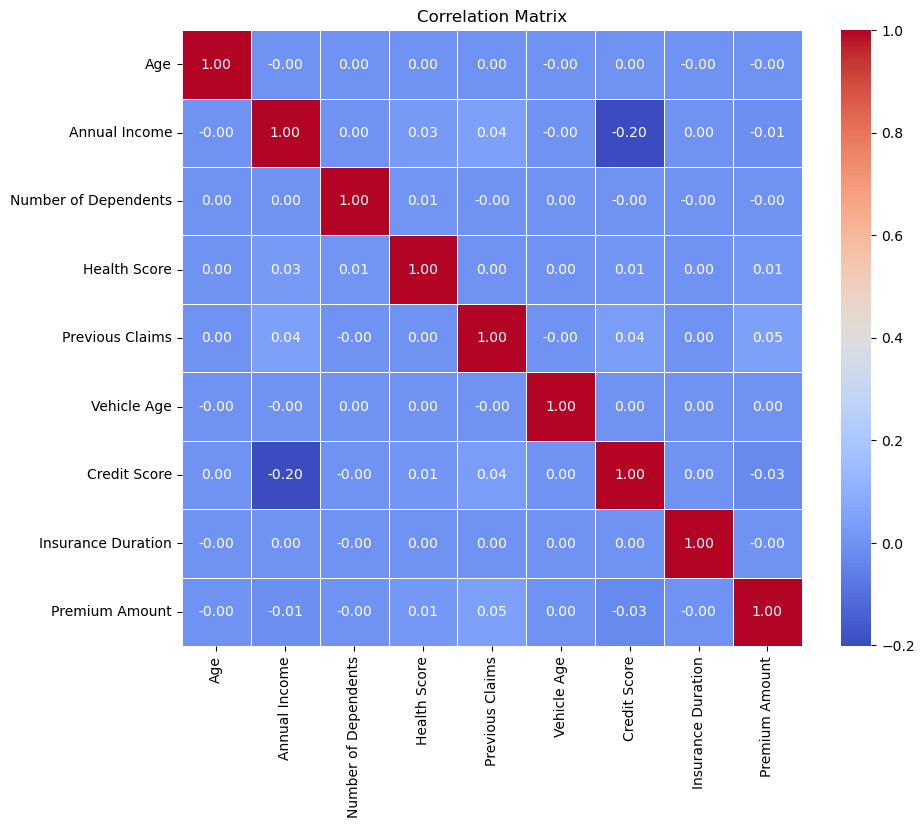

In [683]:
corr_matrix = num_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

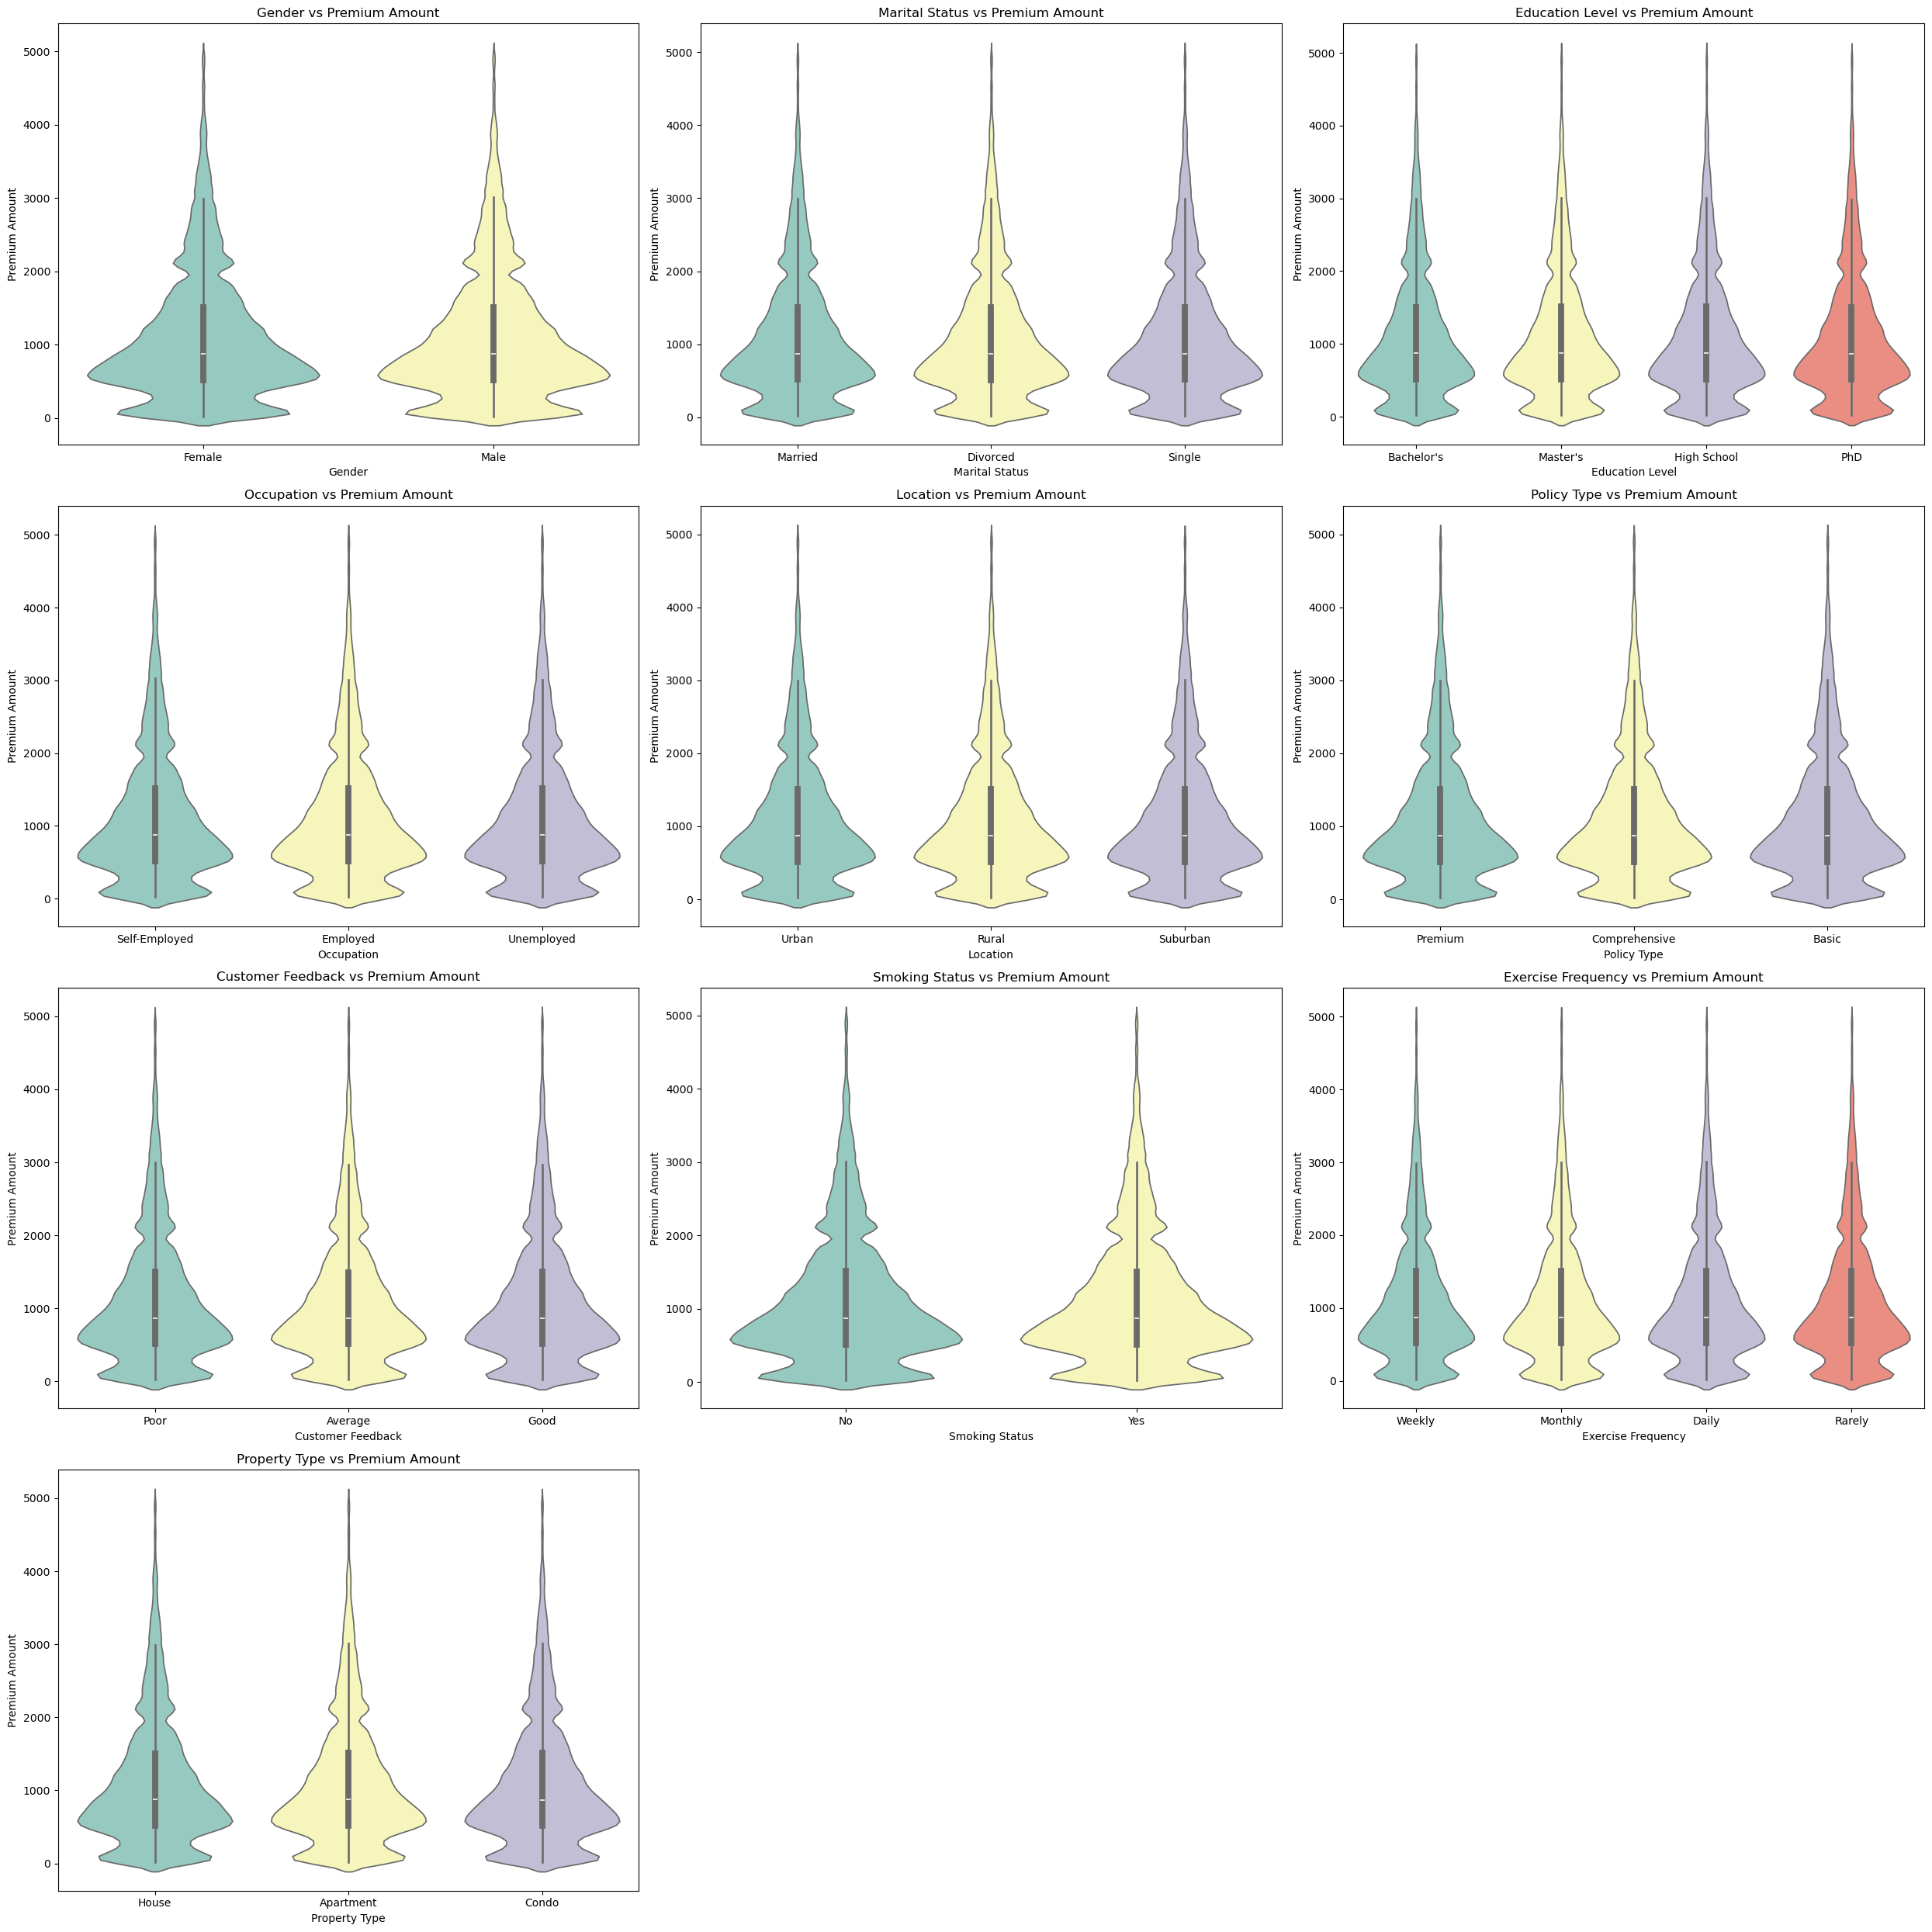

In [684]:
plt.figure(figsize=(25, 25))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 3, i)
    sns.violinplot(x=df[col], y=df['Premium Amount'], palette='Set3')
    plt.title(f'{col} vs Premium Amount')
    plt.xlabel(col)
    plt.ylabel('Premium Amount')

plt.tight_layout()
plt.show()

### Preprocessing

#### Feature Selection